ave1/C1--HighPulse-in-100-out1700-an2100--00013.txt


<IPython.core.display.Javascript object>


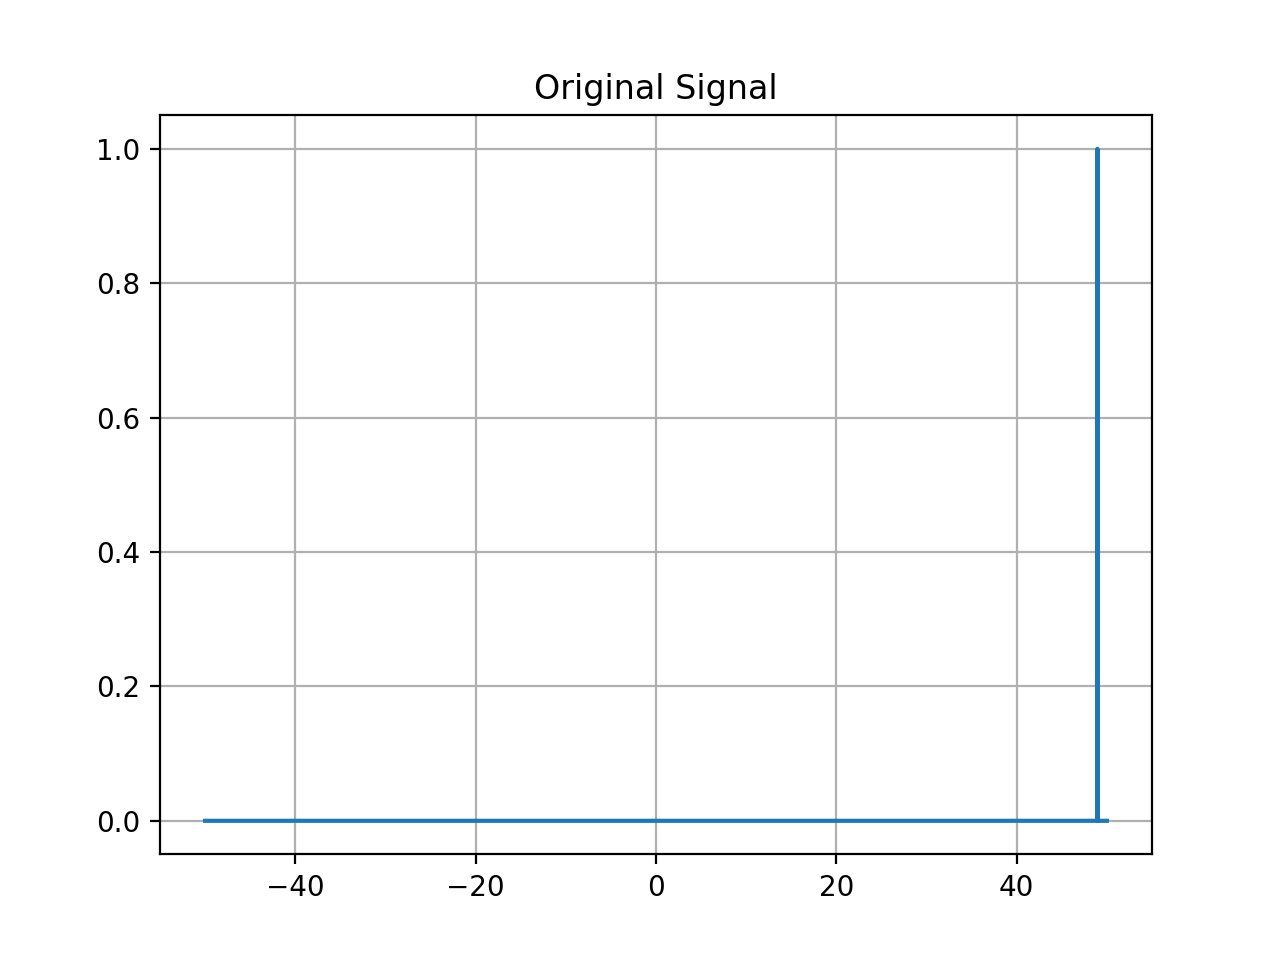

<IPython.core.display.Javascript object>


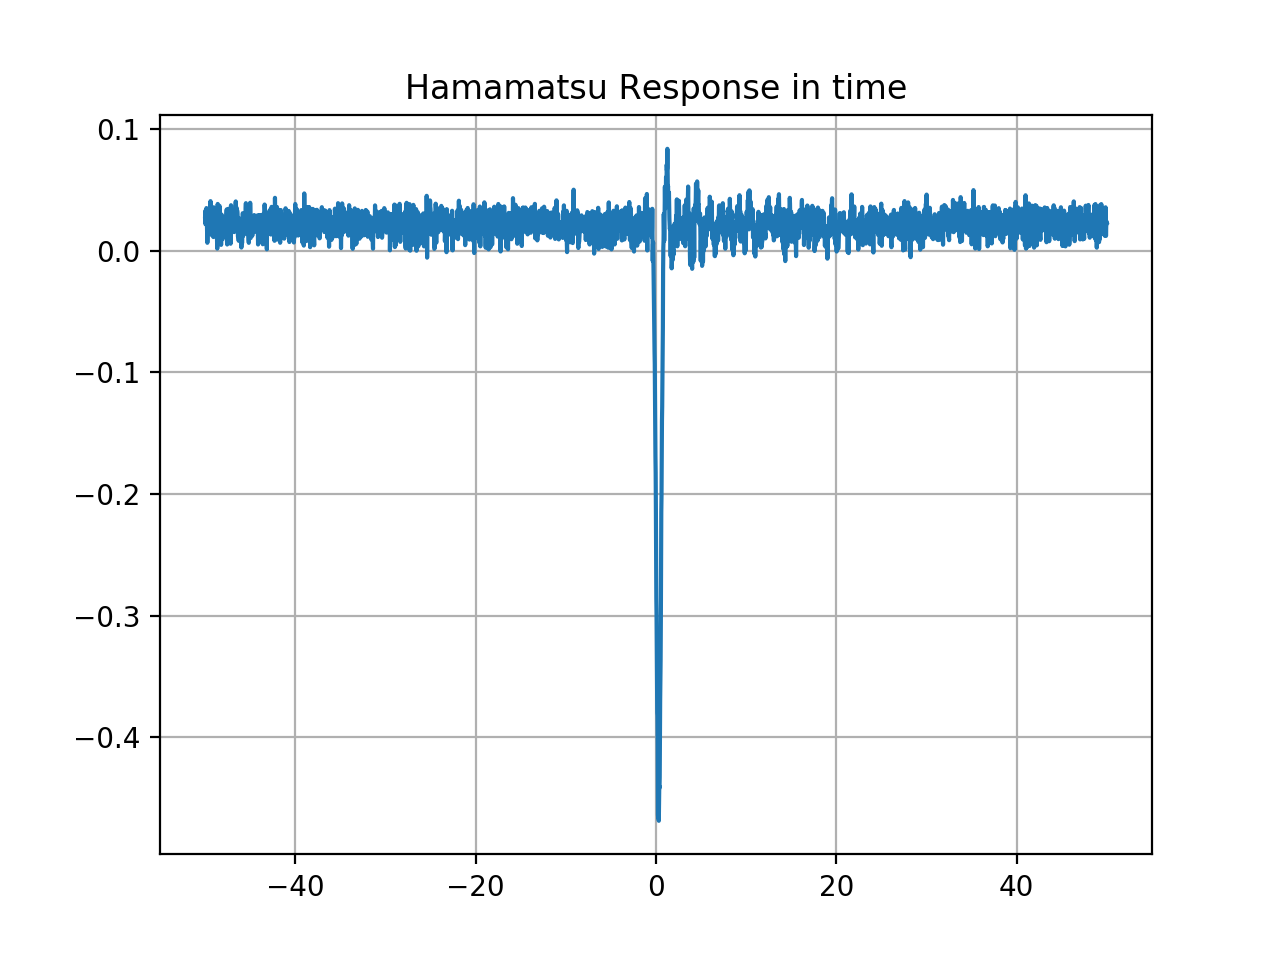

<IPython.core.display.Javascript object>


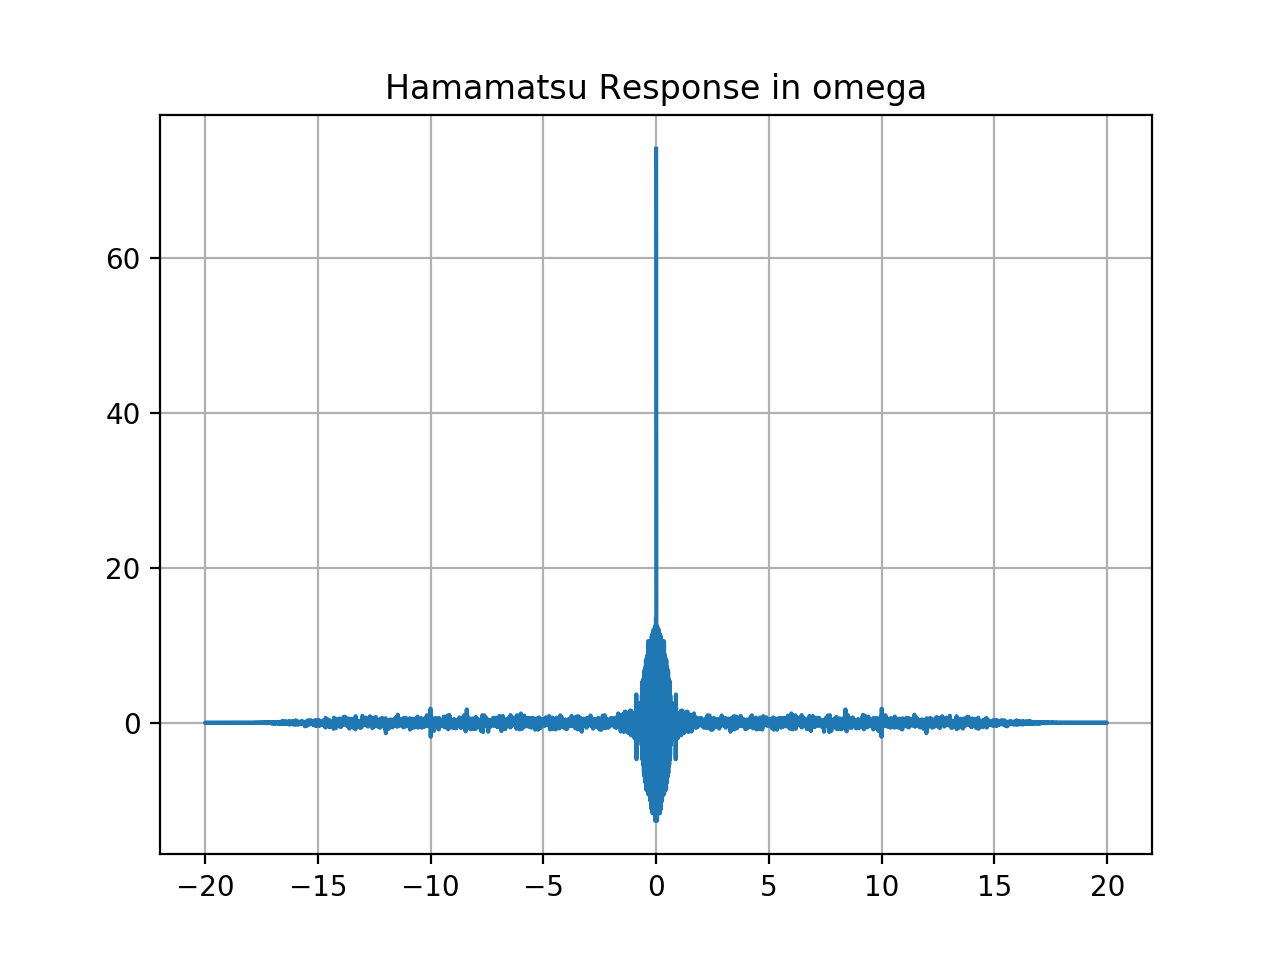

<IPython.core.display.Javascript object>


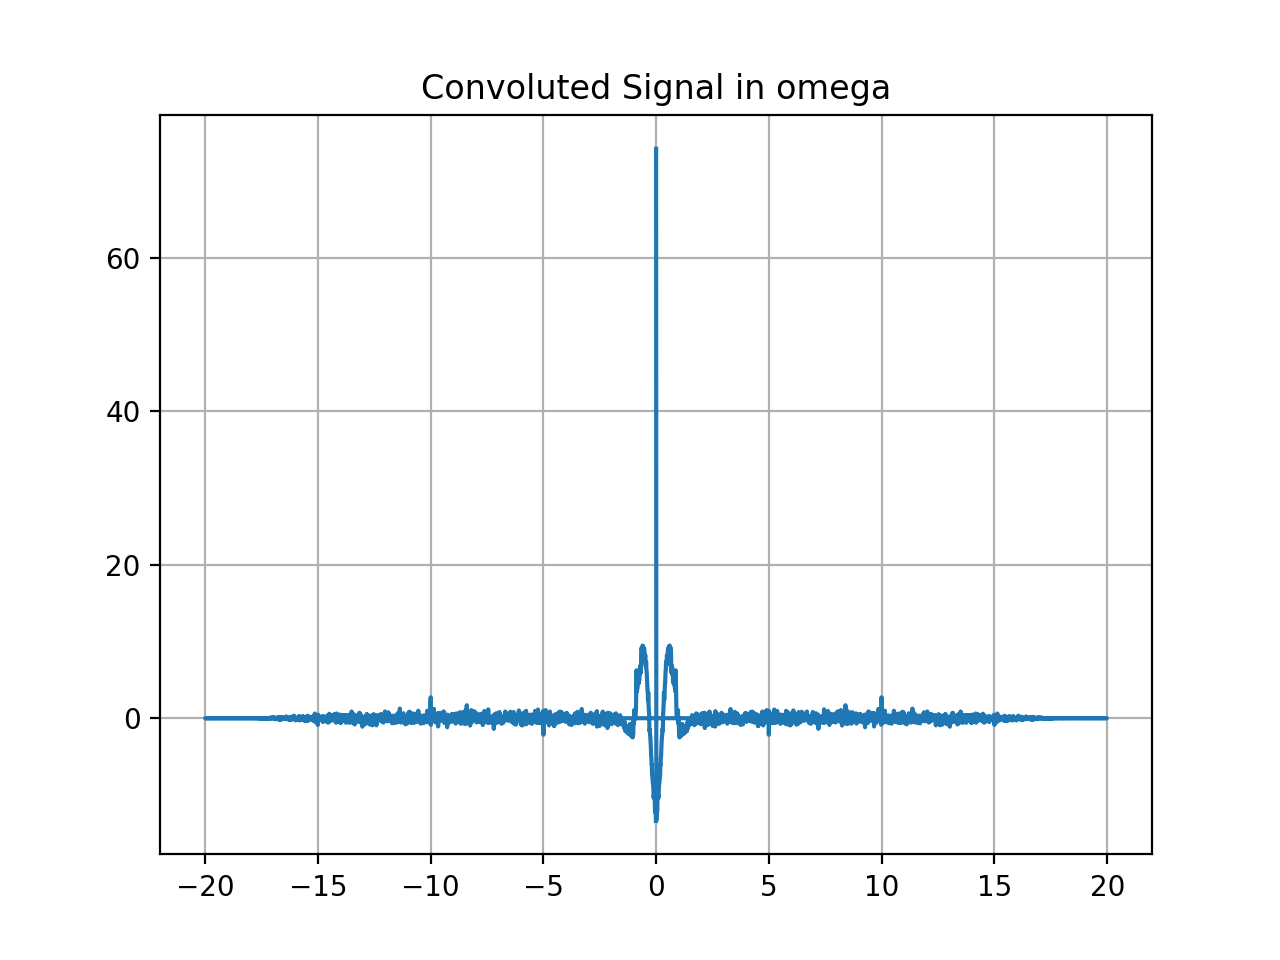

<IPython.core.display.Javascript object>


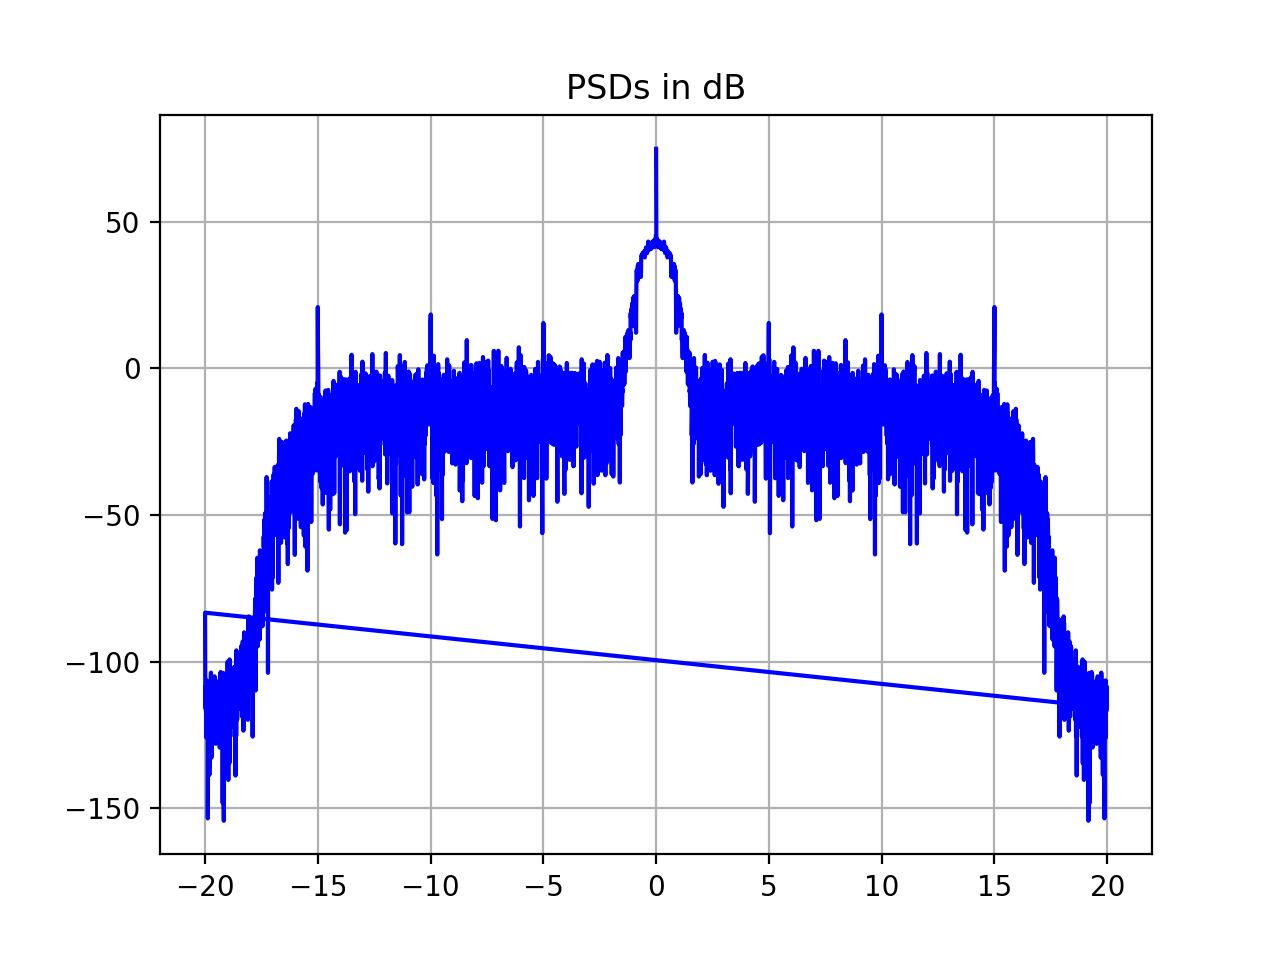

In [9]:
%matplotlib notebook

import numpy as np
from scipy.fftpack import fft, fftfreq, ifft
from scipy import signal
import pandas as pd
import cmath
import matplotlib.pyplot as plt

#select a random response within 10-99
filename = 'ave1/C1--HighPulse-in-100-out1700-an2100--000' + str(np.random.randint(10,99)) + '.txt'
print filename
df = pd.read_table(filename, sep="\t", names={'I','II'},
                   dtype = {'I': np.float64, 'II': np.float64}, usecols = [1,0], skiprows=5) 
time = df['I'].tolist()
time = [ time[i]* 1.0e9 for i in range(len(time))]
h = df['II'].tolist()

#generating one peak unit impulse signal at any random time starting from time=0
idx=np.random.randint(len(time)/2,len(time))
#idx = len(time)/2
sig = signal.unit_impulse(len(time), idx=idx)

#N0 = 0.1 #variance
#noise = np.random.normal(size=len(sig), scale=np.sqrt(N0))

freq = fftfreq(len(h),d = time[1]-time[0])
H = fft(h)

#generating convoluting signal
G = np.exp(-2*np.pi*1j*freq*time[idx])*H #+ fft(noise)

#PSD calculation
#psdn = np.abs(fft(noise))**2
psdg = np.abs(G)**2

fig = plt.figure()
ax = fig.subplots() 
ax.plot(time,sig) 
ax.set_title(label='Original Signal')
ax.grid(True)

fig = plt.figure()
ax = fig.subplots()
ax.plot(time,h)
ax.set_title(label='Hamamatsu Response in time')
ax.grid(True)

fig = plt.figure()
ax = fig.subplots()
ax.plot(freq,H)
ax.set_title(label='Hamamatsu Response in omega')
ax.grid(True)

fig = plt.figure()
ax = fig.subplots()
ax.plot(freq,G)
ax.set_title(label='Convoluted Signal in omega')
ax.grid(True)

fig = plt.figure()
ax = fig.subplots()
#ax.plot(freq,20*np.log10(psdn),color='g')
ax.plot(freq,20*np.log10(psdg),color='blue')
ax.set_title(label='PSDs in dB')
ax.grid(True)

In [10]:
time[idx]

48.95506